# Problems 10 - K-Nearest Neighbour Classification

We will be working with the Iris dataset, which is a dataset with measurements of plants (flowers). Each plant has four unique features: sepal length, sepal width, petal length and petal width.

The type of each plant (species) is also specified, and it is either of these three classes:
* Iris Setosa (0)
* Iris Versicolour (1)
* Iris Virginica (2)

Here are a couple of images to get an idea of the problem:

|Iris Setosa|Iris Versicolor|Iris Virginica|
|:-----:|:-----:|:-----:|
|![Iris Setosa][setosa]|![Iris Versicolor][versicolor]|![Iris Virginica][virginica]|

[setosa]: iris_setosa.jpg "Iris Setosa"
[versicolor]: iris_versicolor.jpg "Iris Versicolor"
[virginica]: iris_virginica.jpg "Iris Virginica"

We are given some measurements for some of the specimens we have (e.g. the sepal length and width). Here's a small sample of our data:

| Sepal length | Sepal Width | Petal Length | Petal Width |Class|
|:---:|:---:|:---:|:---:|:---:|
| 6.3 | 2.8 | 5.1 | 1.5 | 2 |
| 5.  | 3.4 | 1.6 | 0.4 | 0 |
| 5.6 | 2.5 | 3.9 | 1.1 | 1 |
| 5.1 | 3.4 | 1.5 | 0.2 | 0 |
| 5.4 | 3.4 | 1.5 | 0.4 | 0 |
| 6.3 | 3.4 | 5.6 | 2.4 | 2 |
| 7.7 | 3.8 | 6.7 | 2.2 | 2 |
| 6.  | 2.2 | 5.  | 1.5 | 2 |
| 6.7 | 3.  | 5.  | 1.7 | 1 |
| 5.6 | 2.8 | 4.9 | 2.  | 2 |
| 6.1 | 3.  | 4.6 | 1.4 | 1 |
| 4.9 | 3.1 | 1.5 | 0.2 | 0 |
| 6.4 | 2.9 | 4.3 | 1.3 | 1 |
| 6.3 | 2.8 | 5.1 | 1.5 | 2 |
| 7.2 | 3.2 | 6.  | 1.8 | 2 |
| 6.3 | 3.3 | 6.  | 2.5 | 2 |
| 5.7 | 2.8 | 4.5 | 1.3 | 1 |
| 6.  | 3.  | 4.8 | 1.8 | 2 |
| 5.7 | 2.8 | 4.1 | 1.3 | 1 |
| 5.7 | 2.6 | 3.5 | 1.  | 1 |

Can we build a k-NN classifier that can determine if the flower is an Iris Setosa, Iris Versicolour or Iris Virginica? For this exercise we will be using the scikit implementation of Nearest Neighbours classifier: https://scikit-learn.org/stable/modules/neighbors.html

<br>
Let's start with loading the Iris dataset. To start with, we will start with only two of the four provided features.

We imported (150, 4) data samples
We imported (150,) target labels


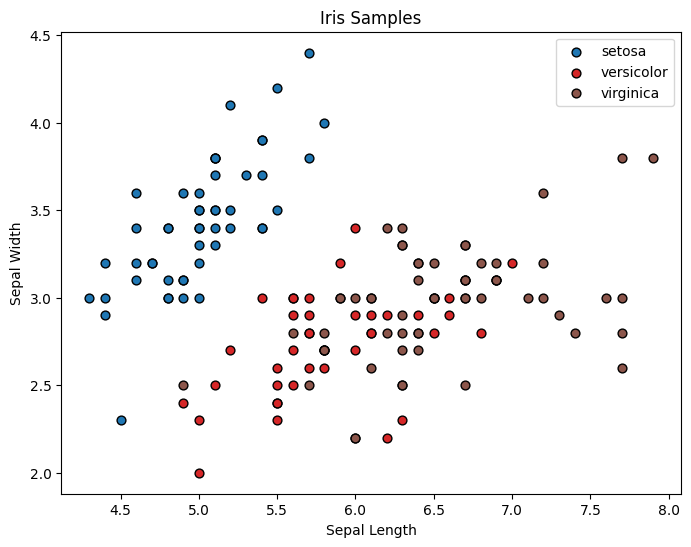

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import the Iris dataset
iris = datasets.load_iris()

print("We imported {} data samples".format(iris.data.shape))
print("We imported {} target labels".format(iris.target.shape))

# Let's keep only the first two features, corresponding to Sepal Length and Sepal Width
X = iris.data[:, :2]
y = iris.target # And keep the output clases in our variable y

plt.figure(figsize=(8, 6))    
for c, name, col in zip(set(y), iris.target_names, ["tab:blue", "tab:red", "tab:brown"]):
    plt.scatter(X[y==c, 0], X[y==c, 1], 
                color = col, edgecolor='k', 
                label = name, s=40)
    
plt.title("Iris Samples")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()    
plt.show()

It is always necessary to keep some part of the data aside, in order to measure how well we are doing. We will therefore split the data into a part that we will use for training (the training set) and a part that we will use for testing (the test set).

The `train_test_split()` function of `sklearn` automates this process, and makes sure that the distribution of points from the different classes is the same in the test and the training set.

In [80]:
# Create a split in training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #Keep 25% of the data as the test set

# Para entrenar el clasificador
# X_train and y_train

# Para testear el clasificador
# X_test, y_test


print(X_train.shape)
print(np.unique(y_train))
print(X_test.shape)
print(np.unique(y_test))

(112, 2)
[0 1 2]
(38, 2)
[0 1 2]


In [81]:
# We create an instance of Nearest Neighbours Classifier and fit the data.

n_neighbours = 1 # Number of neigbours we will use for the classification by default

clf = neighbors.KNeighborsClassifier(n_neighbours, weights='distance', algorithm = 'kd_tree')
clf.fit(X_train, y_train)
clf.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'distance'}

Once the Data is fit, we can predict the value for any new point, by calling the function `predict()` of KNeighbourClassifier as `clf.predict(X)`

In [82]:
# Let's make a prediction
sl = 5.3 # Sepal length (cm)
sw = 3.1 # Sepal width (cm)

predictedClass = clf.predict([[sl, sw]])

print(predictedClass)

[1]


Let's visualise a bit better what is happening

Prediction: Iris Versicolour


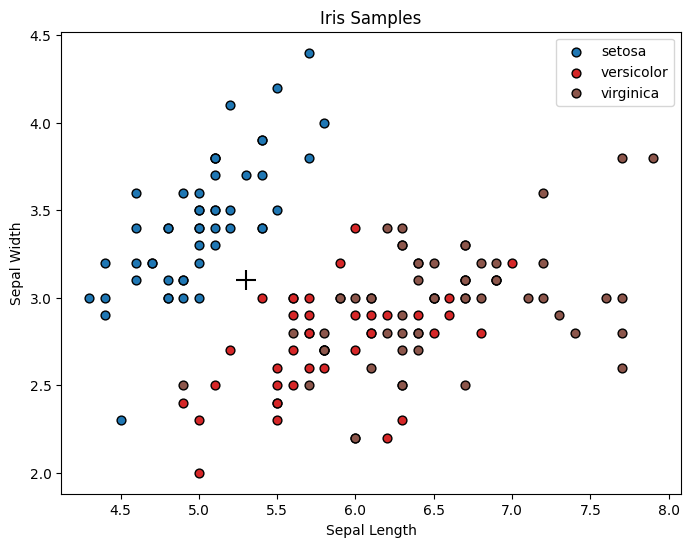

In [83]:
# First, print out the class name
print('Prediction: ', end='')

if predictedClass == 0: 
    print('Iris Setosa')
elif predictedClass == 1:
    print('Iris Versicolour')
else:
    print('Iris Virginica')
    
# Now do a scatter plot of the training data
plt.figure(figsize=(8, 6))    
for c, name, col in zip(set(y), iris.target_names, ["tab:blue", "tab:red", "tab:brown"]):
    plt.scatter(X[y==c, 0], X[y==c, 1], 
                color = col, edgecolor='k', 
                label = name, s=40)

# Now plot the testing example as +
plt.scatter(sl, sw, c = 'black', marker = '+', s = 200) # let's also plot the query point as a big, black cross
    
plt.title("Iris Samples")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()    
plt.show()

</br>

You can try to repeat the prediction for different inputs (values of the two input features).

We can use the prediction function to draw the areas associated with each class. The function below is using `predict()` iteratively, over a grid of values, and then uses the predictions to show the decision plot and colour areas associated to each class in a different color. You can use this function as a black box.

In [84]:
# This function plots the decision function of a classifier in a 2D space
# You can use it just as a black box.
# Input parameters:
#     clf : your classifier
#     X : an array of size [n_samples, n_features] holding the data samples
#     y : an array of size [n_samples] with the class labels of each sample
def plot_classifier_boundary(clf, X, y, ax = None):

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # If the user has given us a axis, use this axis to plot stuff, otherwise, create a new figure
    if (ax == None):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot()    

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)    
    for c, name, col in zip(set(y), iris.target_names, ["tab:blue", "tab:red", "tab:brown"]):
        ax.scatter(X[y==c, 0], X[y==c, 1], 
                    color = col, edgecolor='k', 
                    label = name, s=40)
    
    ax.set_title("Iris Samples")
    ax.set_xlabel("Sepal Length")
    ax.set_ylabel("Sepal Width")
    ax.legend()    
    # plt.show()

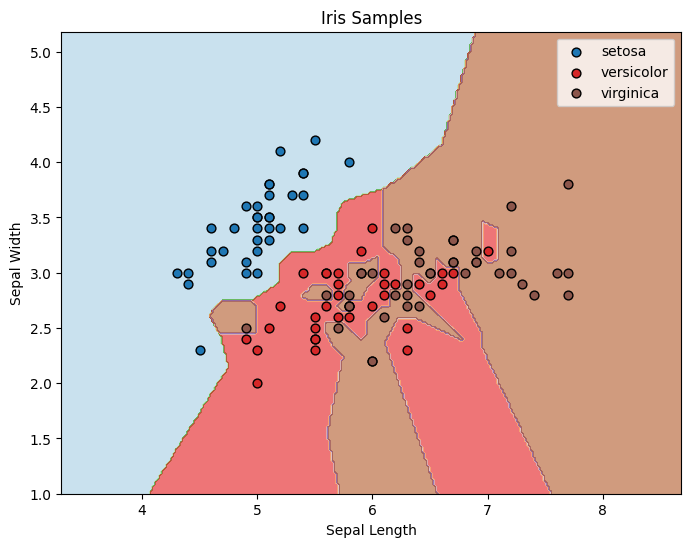

In [85]:
plot_classifier_boundary(clf, X_train, y_train)

<font color=blue>What do you think of the plot above? Is this a good model? How could you improve it? </font>

---

Its not a bad model, but also definitely not a really good one. Setosa is well isolated and its going to be fitted well, but versicolor and virginica are overlapping in the middle and mixing up. That might be a reason for wrong categorization of them.

To make it better i would either use more features like petal length and petal width so that we can distinguish one from another.

---

Before trying anything else, let's check how many points we got right (the accuracy value), you can use the `score()` function of KNeighbourClassifier as `clf.score(X, y)`

Let's try it first on the train set.

In [86]:
print ("Train Accuracy : " + str(clf.score(X_train, y_train)))

Train Accuracy : 0.9553571428571429


<font color=blue>Does this score make sense to you? What did you expect to get? Can you come up with any explanation for this result? </font>

---

It makes sense that its high, because Setosa is very distinct, and Versicolor and Virginica are not completely mixed. But i would not expect it to be that high. The reason is that We are checking the accuracy on the dataset that the model was trained on. Its not really a good practise because we should be testing models on new data.

---


<font color=blue> Calculate the score (accuracy) on the test set. </font>

In [87]:
print("Test Accuracy : " + str(clf.score(X_test[:, :2], y_test)))

Test Accuracy : 0.7105263157894737


In the predictions we did above, we used the default number of neighbours that we provided when we defined the classifier (=1). If we want to ask the classifier to use a different number of neighbours, we can either retrain it (could take a lot of time), or just inform it that we want to use a different value for the parameter `n_neighbours` by calling the function `set_params`. For example, to use 10 neighbours instead of the default 1, we could do the following:

In [88]:
clf.set_params(n_neighbors = 10)

predictedClass = clf.predict([[sl, sw]])

print('Prediction: ', end='')

if predictedClass == 0:
    print('Iris Setosa')
elif predictedClass == 1:
    print('Iris Versicolour')
else:
    print('Iris Virginica')

Prediction: Iris Setosa


Note that by calling `set_params` you change the parameters of the classifier permanently (until you decide to change it again). if you call predict again, it will now be using 10 nearest neighbours.

<font color=blue> Try to repeat the classification for different values of neighbours (k), plot the classifier boundary and calculate the score over the test set. Which is the best k? </font>

Test Accuracy for k = 1: 0.71
Test Accuracy for k = 2: 0.74
Test Accuracy for k = 3: 0.71
Test Accuracy for k = 4: 0.74
Test Accuracy for k = 5: 0.79


/var/folders/qv/tbfhtt9j2tbcww__1m8qw1v80000gn/T/ipykernel_1563/3621321929.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([results_table, pd.DataFrame({"k": [k], "Test Accuracy": [test_accuracy]})], ignore_index=True)


Test Accuracy for k = 10: 0.79
Test Accuracy for k = 15: 0.82
Test Accuracy for k = 20: 0.79
Test Accuracy for k = 30: 0.79
Test Accuracy for k = 40: 0.79
Test Accuracy for k = 50: 0.79


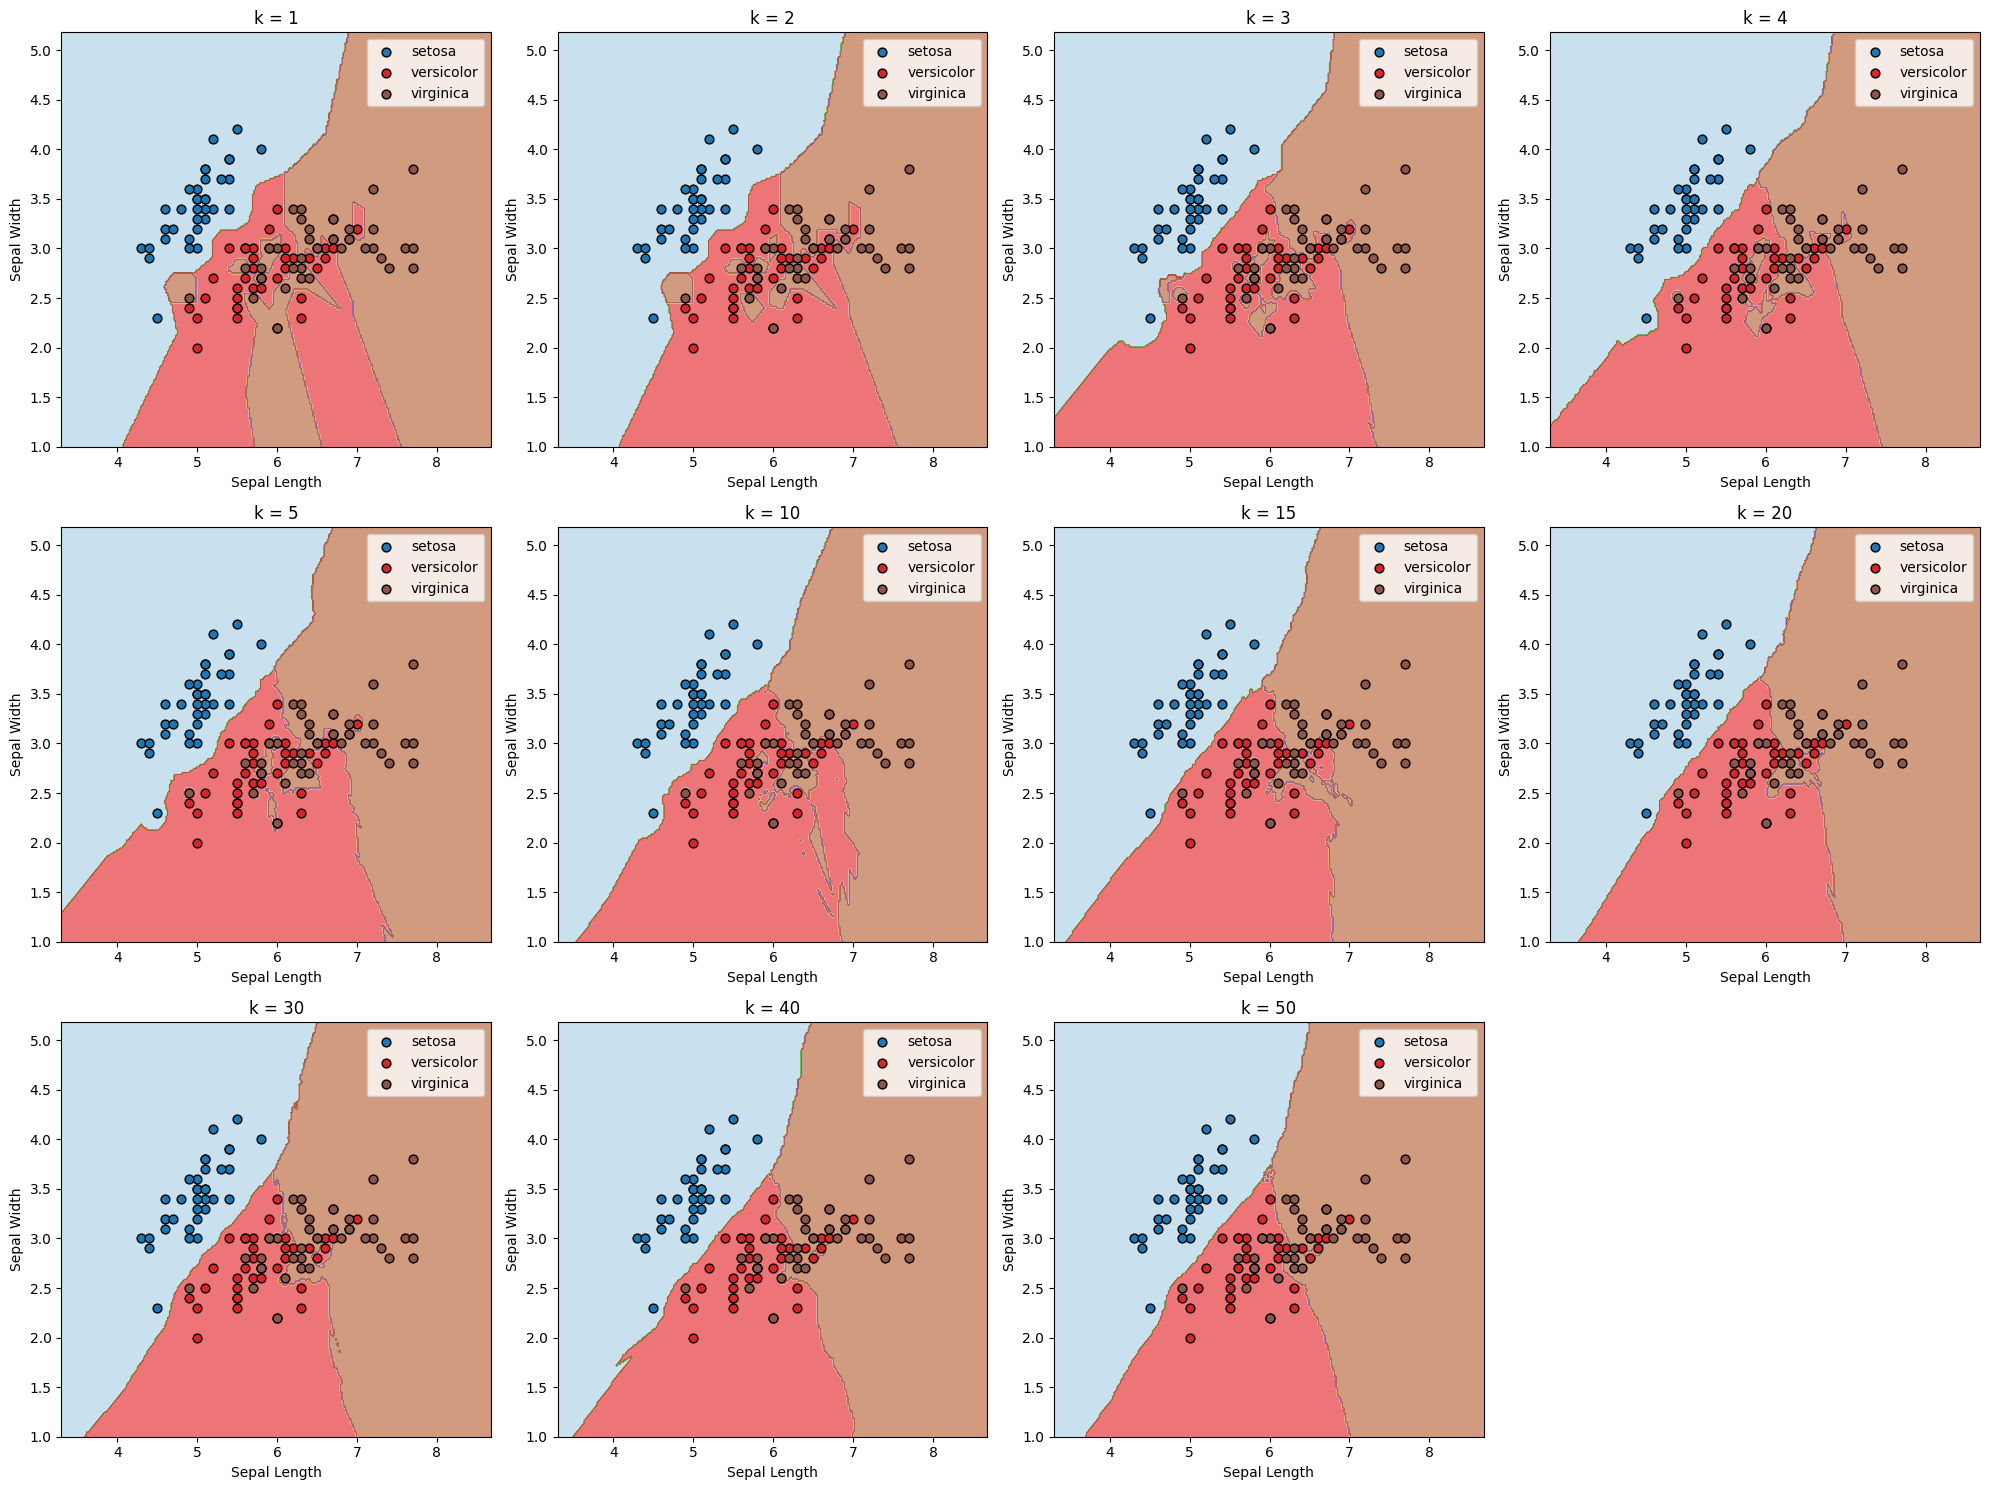

     k  Test Accuracy
0    1       0.710526
1    2       0.736842
2    3       0.710526
3    4       0.736842
4    5       0.789474
5   10       0.789474
6   15       0.815789
7   20       0.789474
8   30       0.789474
9   40       0.789474
10  50       0.789474


In [89]:
import pandas as pd

results_table = pd.DataFrame(columns=["k", "Test Accuracy"])

k_values = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50]
fig, ax = plt.subplots(3, 4, figsize=(20, 15)) 
ax = ax.ravel()

for i, k in enumerate(k_values):
    clf.set_params(n_neighbors=k)
    
    plot_classifier_boundary(clf, X_train, y_train, ax=ax[i])
    ax[i].set_title(f"k = {k}")
    
    test_accuracy = clf.score(X_test[:, :2], y_test)
    print(f"Test Accuracy for k = {k}: {test_accuracy:.2f}")
    
    results_table = pd.concat([results_table, pd.DataFrame({"k": [k], "Test Accuracy": [test_accuracy]})], ignore_index=True)

for j in range(len(k_values), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

print(results_table)


<font color=blue> Make a plot of the Accuracy against the number of neighbours (k). Does the plot confirm your selection of k? </font>

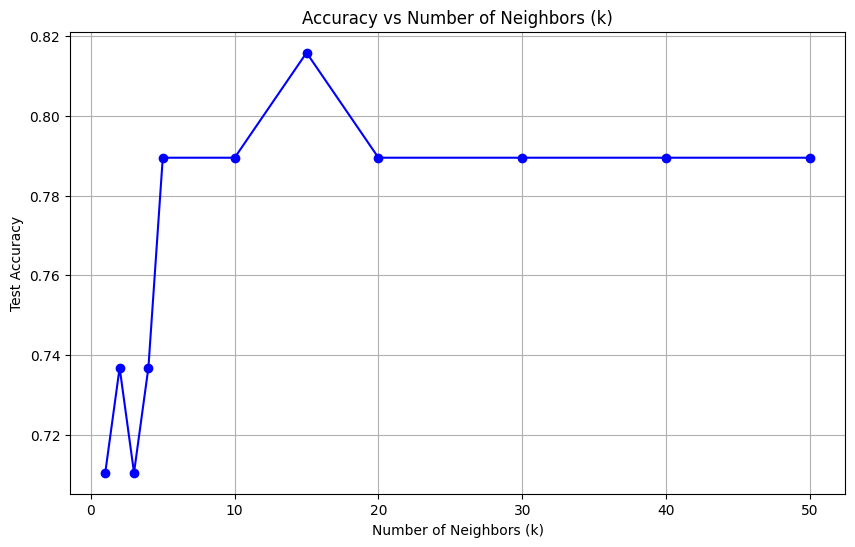

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(results_table["k"], results_table["Test Accuracy"], marker='o', linestyle='-', color='b')
plt.title("Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

---

The best k is around 15, and yes, since the plot is based on the stats that i saw before it confirms my selection

---

We are only using half of the features available in the Iris dataset. There are cases we still cannot classify correctly. Maybe we could improve on these if we added more features. On the downside, working with more than 2 dimensions means that we will not be able to plot the boundaries...

Let's add one more feature and recreate the training and test sets.

In [91]:
X = iris.data[:, :3]
y = iris.target

# Create a split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Keep 25% of the data for testing, the rest for training

print(X_train.shape)
print(np.unique(y_train))
print(X_test.shape)
print(np.unique(y_test))

(112, 3)
[0 1 2]
(38, 3)
[0 1 2]


<font color=blue> Repeat the process and make a plot of the Accuracy against the number of neighbours (k) in this new case. Can you improve your results compared to the accuracy calculated before? </font>

/var/folders/qv/tbfhtt9j2tbcww__1m8qw1v80000gn/T/ipykernel_1563/1858560197.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table_new = pd.concat([results_table_new, pd.DataFrame({"k": [k], "Test Accuracy": [test_accuracy_new]})], ignore_index=True)


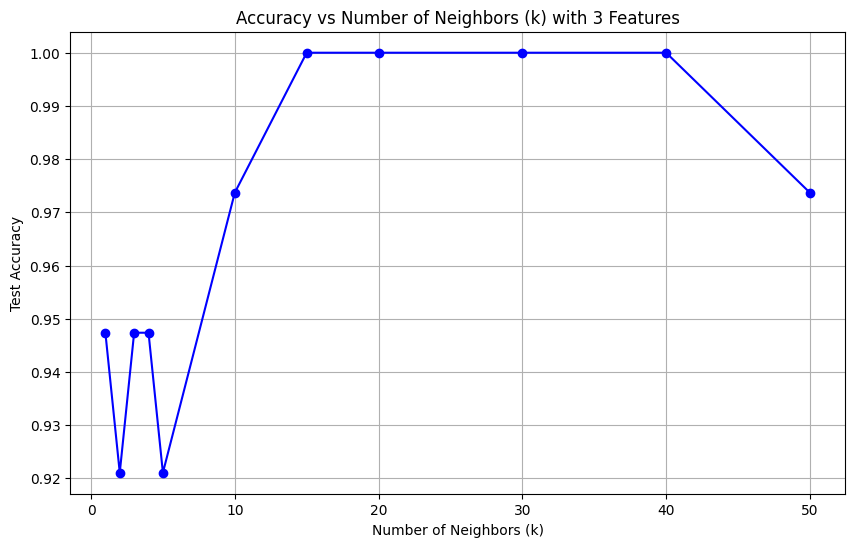

     k  Test Accuracy
0    1       0.947368
1    2       0.921053
2    3       0.947368
3    4       0.947368
4    5       0.921053
5   10       0.973684
6   15       1.000000
7   20       1.000000
8   30       1.000000
9   40       1.000000
10  50       0.973684


In [92]:
# YOUR CODE HERE
results_table_new = pd.DataFrame(columns=["k", "Test Accuracy"])

k_values_new = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50]
for k in k_values_new:
    # Retrain the classifier with the updated training data
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='kd_tree')
    clf.fit(X_train, y_train)
    
    # Calculate the test accuracy
    test_accuracy_new = clf.score(X_test, y_test)
    results_table_new = pd.concat([results_table_new, pd.DataFrame({"k": [k], "Test Accuracy": [test_accuracy_new]})], ignore_index=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_table_new["k"], results_table_new["Test Accuracy"], marker='o', linestyle='-', color='b')
plt.title("Accuracy vs Number of Neighbors (k) with 3 Features")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

print(results_table_new)

---

Yes, adding features did improve the test accuracy to nearly perfect levels

---


<font color=blue> Now read the documentation, and check our different options for metrics and algorithms. Make a summary of your findings / problems you encountered. </font>

https://scikit-learn.org/stable/modules/neighbors.html

---

### Summary of Findings:

1. **Metrics**:
    - The k-NN algorithm supports multiple distance metrics such as Euclidean (default), Manhattan, Minkowski, and custom metrics.  
    - Selecting an appropriate metric is important, especially when features have varying scales or units. For exaple, Euclidean distance may not work well without normalization.  

2. **Algorithms**:  
    - The `algorithm` parameter can be set to `ball_tree`, `kd_tree`, `brute`, or `auto`. The `auto` option selects the best algorithm based on the dataset.  
    - The choice of algorithm affects computation time significantly, particularly for large datasets. For example, `kd_tree` and `ball_tree` are efficient for low-dimensional data, while `brute` is better for high-dimensional data.  

---
